<a href="https://colab.research.google.com/github/silverstar0727/study-/blob/master/_posts/graphics/opencv_tutorial_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특정 범위의 픽셀 변경

In [ ]:
 from google.colab import files
uploaded = files.upload()

Saving asdf.jpg to asdf (2).jpg


--- 0.01113581657409668 seconds ---
--- 0.0006852149963378906 seconds ---


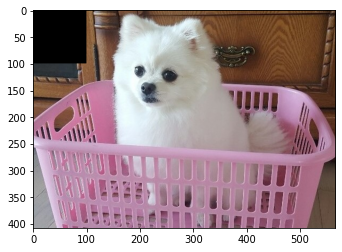

In [ ]:
import cv2
import matplotlib.pyplot as plt
import time

image = cv2.imread('asdf.jpg')

# 시간이 조금 오래걸림
start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        image[i, j] = [255, 255, 255] # 범위에 대해 일일이 바꾸는 법
print("--- %s seconds ---" % (time.time() - start_time))

# 시간이 조금 덜걸림
start_time = time.time()
image[0:100, 0:100] = [0, 0, 0] # 범위를 바꾸는 법
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# ROI이미지 연산
관심있는 부분을 추출하여 복사

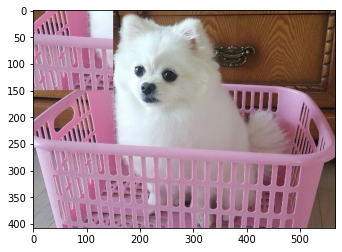

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('asdf.jpg')

# Numpy Slicing: ROI 처리 가능
roi = image[200:350, 50:200]

# ROI 단위로 이미지 복사하기
image[0:150, 0:150] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 픽셀별 색상 다루기

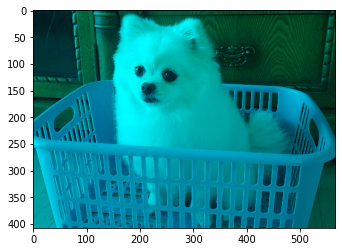

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('asdf.jpg')
image[:, :, 2] = 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 크기조절

보간법을 적용하여 이미지의 크기를 조정

cv2.resize(image, dsize,fx, fy, interpolation)
* dsize: Manual Size
* fx: 가로비율
* fy: 세로비율
* interpoation: 보간법
 * INTER_CUBIC:사이즈를 크게할 때 사용
 * INTER_AREA: 사이즈를 작게할 때 사용

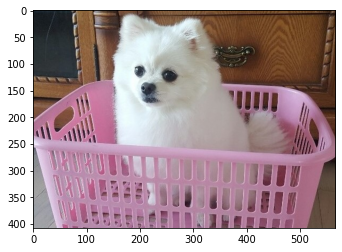

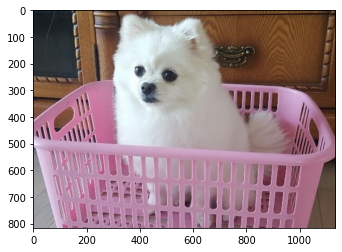

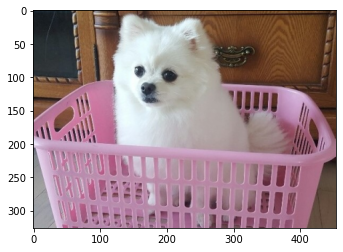

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 일반적으로 출력
image = cv2.imread('asdf.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# x와 y축 방향으로 2배씩 확장하고, 사이즈를 크게할 때의 보간법을 사용
expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

# x축과 y축 방향으로 0.8배씩 수축시키고, 사이즈를 작게할 때의 보간법을 사용
shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

# 이미지 위치 변경
변환행렬 사용(Affine 변환)

cv2.warpAffine(image, M, dszie)
* M: 변환 행렬
* dsize: Manual Size

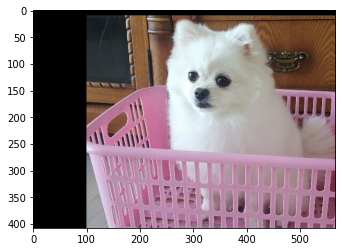

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('asdf.jpg')

# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

M = np.float32([[1, 0, 100], [0, 1, 10]]) # 변환행렬에 대한 정보
dst = cv2.warpAffine(image, M, (width, height)) # 아핀변환

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

## 이미지 회전
회전 변환 사용

cv2.getRotationMatrix2D(center, angle, scale)
* center: 회전중심
* angle: 회전 각도
* scale: Scale Factor

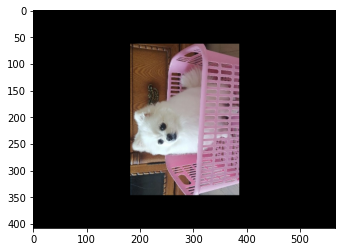

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('asdf.jpg')

# 행과 열 정보만 저장합니다.
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5) # 변환행렬 생성(회전각도는 90, 크기는 절반)
dst = cv2.warpAffine(image, M, (width, height)) # 아핀변환

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()